# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


In [1]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape #lineas, columnas
#x.size #cantidad de elementos
#x



(101, 501)

(101, 1)

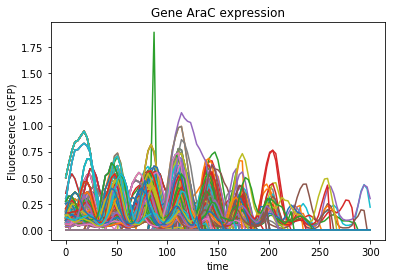

In [2]:
plotter.plot(time, x) # all of the cell trajectories into the same plot

plotter.title("Gene AraC expression")
plotter.xlabel('time')
plotter.ylabel('Fluorescence (GFP)') 

time.shape

#está bien aunque el tiempo llegue a mas de 140, la cosa es que a partir de ahi las trayectorias son 0

In [3]:
x.shape

(101, 501)

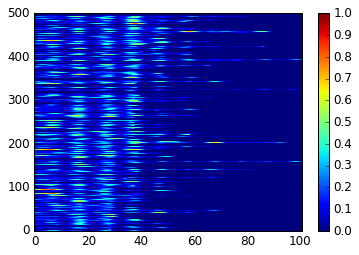

In [4]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(x[:,:].T, aspect='auto',origin='lower',  #la T es pq quiere tener las cels en la columna
           cmap='jet')
plotter.colorbar()
plotter.clim(0,1)

In [35]:
peaks = find_peaks(x[:,1])



In [209]:
from scipy.signal import find_peaks

picos = []

for i in range(x.shape[1]):
    peaks= find_peaks(x[:, i])
    picos.append(x[:,i][peaks[0]])
    
       
print(picos) 

            

[array([0.20912455, 0.11654549, 0.34739995, 0.32897025, 0.08406143]), array([0.46135598, 0.14907495, 0.35601946, 0.43592348, 0.05847783]), array([0.3009476 , 0.13302727, 0.23605567, 0.4368582 , 0.34535627,
       0.14280022]), array([0.35456353]), array([], dtype=float64), array([0.14192905, 0.08626089, 0.28164442, 0.33217028, 0.30972232,
       0.1197621 ]), array([0.16296327]), array([0.1758425 , 0.06540583, 0.18957792, 0.19453902, 0.08227695,
       0.11098527]), array([0.23112172, 0.42886717, 0.29841243, 0.53999387, 0.48834663]), array([0.10979867, 0.25762682, 0.23453471, 0.23998152]), array([0.11751272, 0.30569894]), array([0.27386691]), array([0.21297613]), array([0.0602926 , 0.32000313, 0.17595769]), array([0.10630611, 0.47058191, 0.24531329]), array([0.17527033, 0.38132583, 0.37507721, 0.15879623, 0.22222428]), array([0.0602926 , 0.32000313, 0.17595769]), array([0.10630611, 0.47058191, 0.45149026, 0.20072009, 0.26985064]), array([0.35822552, 0.44595113, 0.33077557, 0.40015575, 

In [131]:
x[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [203]:

amp = []

for i in picos:
    peaks = np.nanmean(i)#mean amplitudes of each cel
    amp.append(peaks)
    
       
print(amp) 


[0.21722033416977998, 0.2921703407589957, 0.26584087219100255, 0.35456352765321375, nan, 0.21191484377323375, 0.16296326530612243, 0.13643791612796194, 0.3973483648785421, 0.2104854305999021, 0.2116058282857221, 0.27386691426802845, 0.2129761295822677, 0.185417804517504, 0.274067105632403, 0.26253877613670157, 0.185417804517504, 0.2997898039497648, 0.32483556744548303, 0.33375937432038333, 0.3737434636602368, 0.24887625338504538, nan, 0.2703485022640195, 0.3314886722352299, 0.21515548257969036, 0.3181303072976338, 0.23353115956780557, 0.1529942563628625, 0.207952404360367, 0.23410155710561542, 0.297636670485846, 0.7009034136057573, 0.3042165726082998, 0.29742299281014367, nan, 0.09388188476349947, 0.5291104045625777, 0.23160539776838718, nan, 0.21191484377323375, 0.3462679240528023, 0.30014498980737164, 0.2948880384936263, 0.03878478964401295, 0.1056137809996325, 0.185417804517504, 0.3161367320078999, 0.3704286983672806, 0.27916602348353786, 0.18316148578459246, 0.1056137809996325, 0.2

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [316]:

tiempos = []

for i in range(x.shape[1]):
    peaks= find_peaks(x[:, i])
    tiempos.append(peaks[0]*3)
print(tiempos)



[array([ 9, 24, 42, 81, 99]), array([ 18,  51,  81, 111, 132]), array([ 21,  51,  78, 108, 141, 171]), array([84]), array([], dtype=int64), array([ 3, 18, 45, 51, 57, 81]), array([84]), array([ 6, 24, 39, 45, 66, 81]), array([ 18,  48,  81, 111, 144]), array([ 27,  48,  87, 102]), array([ 84, 108]), array([87]), array([84]), array([24, 48, 78]), array([18, 48, 81]), array([ 3, 24, 57, 75, 87]), array([24, 48, 78]), array([ 18,  48,  84, 111, 138]), array([ 18,  51,  84, 114, 132]), array([18, 51, 81]), array([ 3, 24, 57, 90]), array([ 24,  51,  84, 105]), array([], dtype=int64), array([42, 48, 69]), array([ 18,  51,  81, 114, 135]), array([27, 51, 69, 84]), array([ 15,  21,  51,  84, 114]), array([ 24,  48,  60,  78, 102]), array([ 3, 21, 51, 75]), array([ 9, 24, 45, 78]), array([ 84, 108]), array([ 9, 45, 78, 87]), array([ 3, 24, 54, 87]), array([15, 21, 51, 87]), array([24, 51, 84]), array([], dtype=int64), array([  6,  21,  48,  75, 108, 129]), array([ 9, 45, 84]), array([27, 45, 87

In [350]:
suma=[]
media=[]
for item in tiempos: #for each sublist of the list"tiempos"
    for i in range(len(item)-1): #for the index of each sublist (-1 porque al final intenta coger un numero más de los que hay por el i+1 del loop)
        a=item[i+1]-item[i] #substract the number in the left to the number in the right  and store the results in the list "suma"
        suma.append(a)
    #print(suma)
    media.append(np.nanmean(suma))#mean of each sublist subtractions results     
    #print(media)
    suma.clear() #we clean the list because otherwise, the values of different sublists would be accumulated and the averages would be wrong

print(media)

    

  

[22.5, 28.5, 30.0, nan, nan, 15.6, nan, 15.0, 31.5, 25.0, 24.0, nan, nan, 27.0, 31.5, 21.0, 27.0, 30.0, 28.5, 31.5, 29.0, 27.0, nan, 13.5, 29.25, 19.0, 24.75, 19.5, 24.0, 23.0, 24.0, 26.0, 28.0, 24.0, 30.0, nan, 24.6, 37.5, 30.0, nan, 15.6, 36.0, 34.5, 39.0, nan, 24.0, 27.0, 25.285714285714285, 26.142857142857142, 28.5, 25.0, 24.0, 15.6, 20.0, 20.25, 30.0, 27.0, 30.0, 31.5, nan, 18.0, 27.0, 39.0, 30.0, nan, nan, 27.0, 32.0, 28.0, 26.0, 30.75, 27.0, 21.0, 19.5, 31.0, 30.0, 34.0, 29.0, 30.0, nan, 22.5, 26.0, 27.0, 27.0, 30.75, 27.0, 32.0, 26.25, nan, 27.0, 23.0, 30.0, 25.5, 25.5, 25.5, 30.0, 26.0, 33.0, nan, 18.75, 29.0, nan, 25.5, 27.0, 31.0, 33.0, 35.0, 30.0, 24.75, 26.4, nan, nan, 32.0, 30.0, 24.0, nan, 24.0, 29.0, 32.25, 40.5, 24.0, 22.0, 27.428571428571427, 30.0, 28.0, nan, nan, nan, 28.0, 34.0, 37.0, 24.75, nan, 23.25, 22.5, 18.0, 25.5, 21.0, 30.0, 31.0, 28.2, 28.5, 12.0, 22.5, nan, nan, 25.5, 18.0, 24.0, 30.0, 12.0, 28.0, 25.0, 26.0, 21.5, nan, 19.0, 31.0, 24.75, 30.33333333333333

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [353]:

truemeans=np.nan_to_num(media, int)
#print(truemeans)
       

In [354]:
def vec_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i]) 
    return x
truemeans=vec_sort(truemeans)
truemeans= truemeans[110:]
print(truemeans)



[ 6.         12.         12.         13.5        15.         15.
 15.         15.6        15.6        15.6        16.8        17.
 18.         18.         18.         18.         18.5        18.75
 19.         19.         19.5        19.5        19.5        19.5
 19.8        19.8        20.         20.         20.25       20.25
 20.25       20.25       20.25       20.25       21.         21.
 21.         21.         21.         21.         21.         21.5
 21.6        21.6        21.75       22.         22.         22.5
 22.5        22.5        22.5        22.8        23.         23.
 23.         23.         23.         23.25       23.25       23.5
 24.         24.         24.         24.         24.         24.
 24.         24.         24.         24.         24.         24.
 24.         24.         24.         24.         24.         24.5
 24.5        24.54545455 24.6        24.6        24.6        24.6
 24.6        24.75       24.75       24.75       24.75       24.75
 24.75       

In [10]:
a=x[:,1]

In [77]:

for i in
a= x[:,1]
amp=find_peaks(a)[0]
amp[amp == np.nan]=0
amp[0]
# test=find_peaks(a)

# amp[0]

6

In [38]:
lt={}
lt[0]=amp
lt[1]=amp




In [26]:

lt

{0: array([ 6, 17, 27, 37, 44]), 1: array([ 6, 17, 27, 37, 44])}

In [27]:
new_array=lt[1]

array([ 6, 17, 27, 37, 44])

In [24]:
lt[0][0]

6